# MySQL <--> Python

In [1]:
# importing libraries
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [2]:
# re-usable func
# func that connect to DB 
def create_server_connection(host_name, user_name, user_password):
    connection = None #close any connection with the server
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")
    
    return connection

pw = "myPassword"  # My Password goes here
db = "school"

In [3]:
# connection test
pw = "myPassword"
connection = create_server_connection("localhost", "root", pw)

MySQL Database connection successful


In [4]:
# re-usable func
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
            print(f"Error: '{err}'")

In [5]:
# query to create the DB
create_database_query= "CREATE DATABASE school"
create_database(connection, create_database_query)

Error: '1007 (HY000): Can't create database 'school'; database exists'


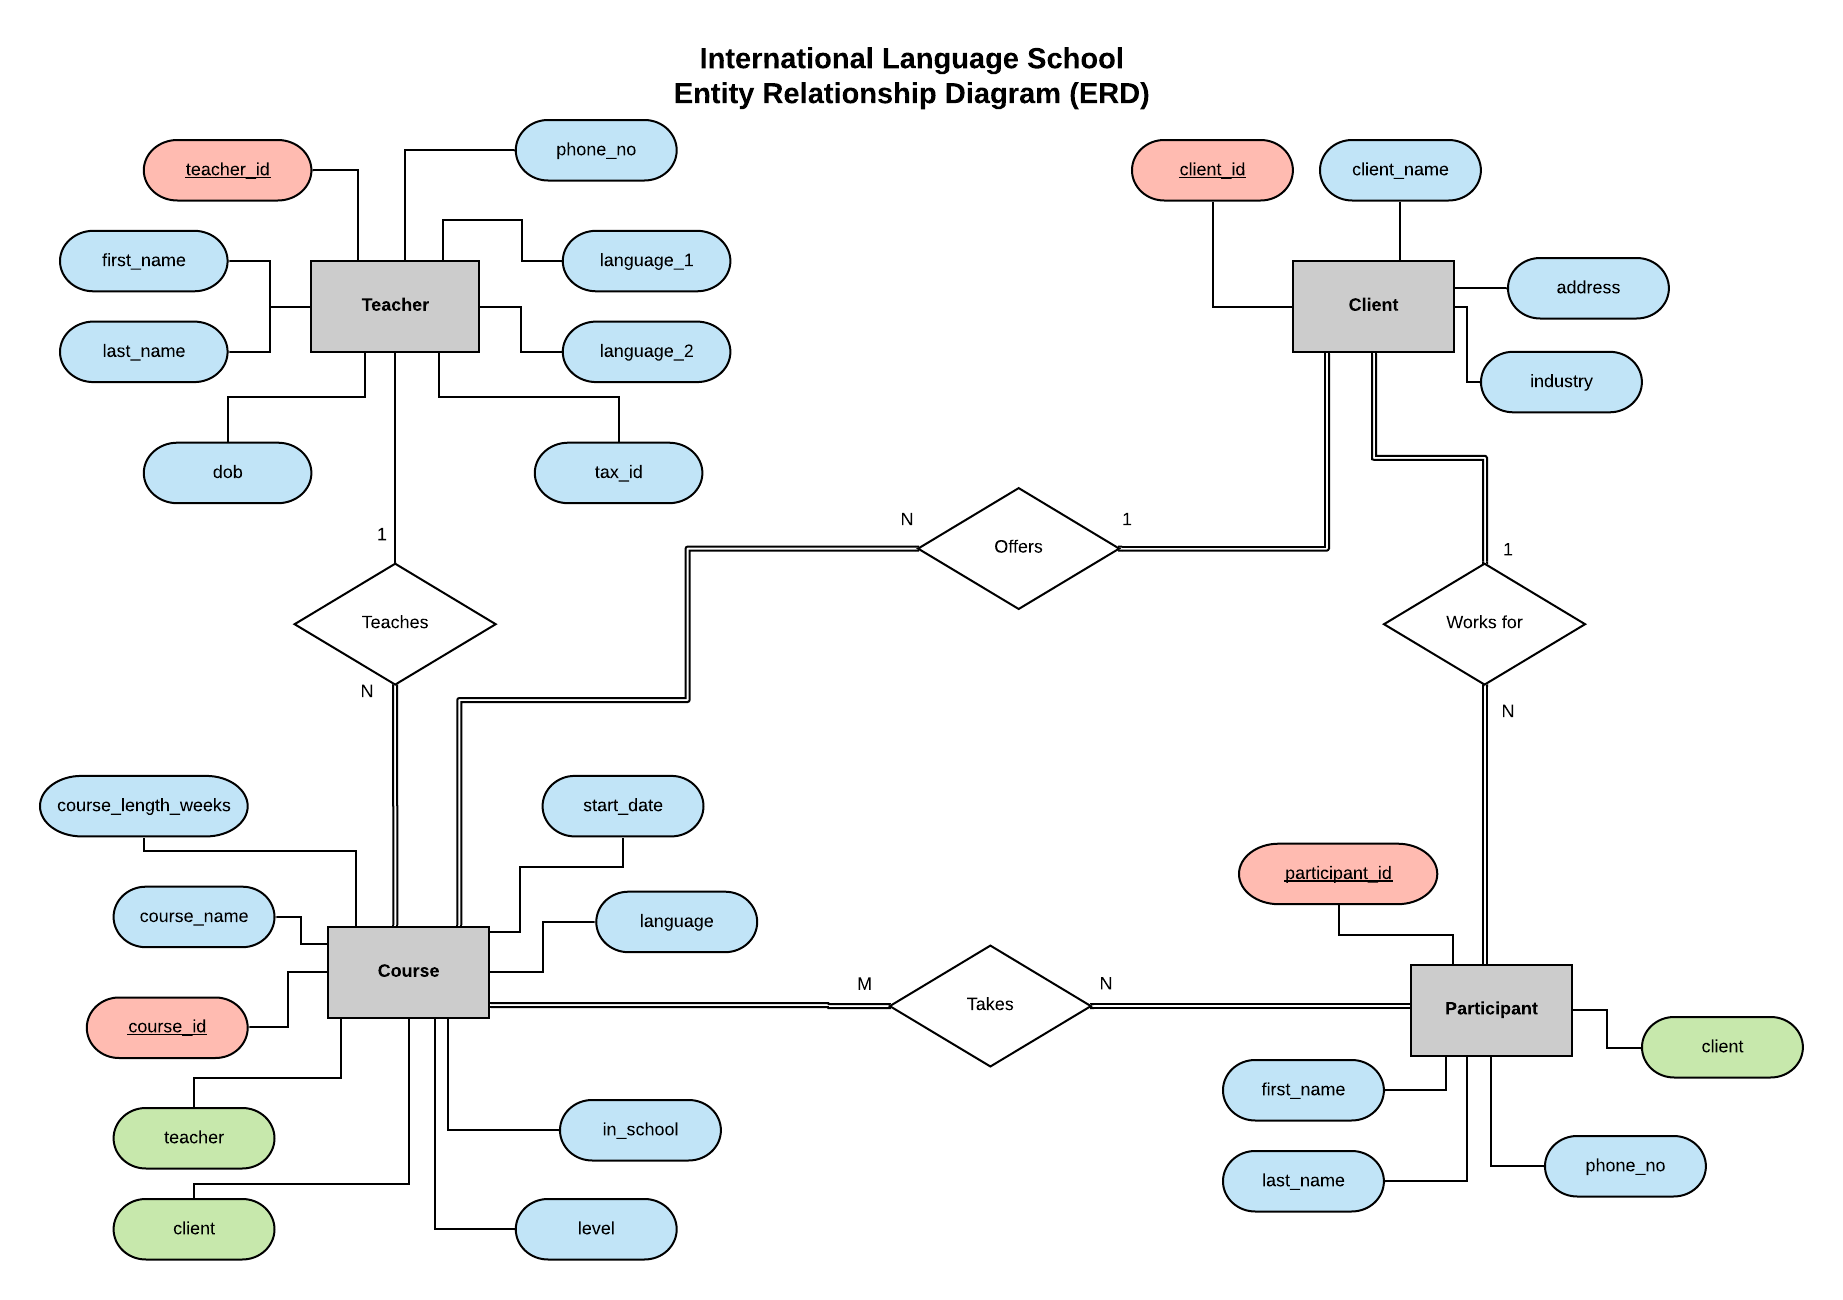

In [6]:
# connect to specific DB, DB's name as argument of func
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database ",db_name," connection sucessful")
    except Error as err:
        print(f"Error: '{err}'")
        
    return connection

In [7]:
# func that pass a to be executed on the specific DB
def execute_query(connection, query):
    cursor = connection.cursor() #a cursor it's just like a cmd line
    try:
        cursor.execute(query)
        connection.commit() #commit = execute the query (enter)
        print("Query sucessful")
    except Error as err:
        print(f"Error: '{err}'")

Creating Tables

In [8]:
# next it will be the command in SQL to create Teacher's Table
# IMPORTANT - USE THE MULTI-LINE FORMATTING by using """ query """
create_teacher_table = """
CREATE TABLE teacher(
    teacher_id INT PRIMARY KEY,
    first_name VARCHAR(40) NOT NULL,
    last_name VARCHAR(40) NOT NULL,
    language1 VARCHAR(3) NOT NULL,
    language2 VARCHAR(3),
    dob date,
    tax_id INT UNIQUE,
    phone_no VARCHAR(20)
    );
"""

# now lets execute this on our DB
connection = create_db_connection("localhost", "root", pw, db) # Connect to the DB
execute_query(connection, create_teacher_table) # Execute the query that we want

MySQL Database  school  connection sucessful
Error: '1050 (42S01): Table 'teacher' already exists'


In [9]:
# creating the other tables

create_client_table = """
CREATE TABLE client (
    client_id INT PRIMARY KEY,
    client_name VARCHAR(40) NOT NULL,
    address VARCHAR(60) NOT NULL,
    industry VARCHAR(20)
);
"""

create_participant_table = """
CREATE TABLE participant (
    participant_id INT PRIMARY KEY,
    first_name VARCHAR(40) NOT NULL,
    last_name VARCHAR(40) NOT NULL,
    phone_no VARCHAR(20),
    client INT
);
"""

create_course_table = """
CREATE TABLE course (
    course_id INT PRIMARY KEY,
    course_name VARCHAR(40) NOT NULL,
    language VARCHAR(3) NOT NULL,
    level VARCHAR(2),
    course_lenght_weeks INT,
    start_date DATE,
    in_school BOOLEAN,
    teacher INT,
    client INT
);
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, create_client_table)
execute_query(connection, create_participant_table)
execute_query(connection, create_course_table)

MySQL Database  school  connection sucessful
Error: '1050 (42S01): Table 'client' already exists'
Error: '1050 (42S01): Table 'participant' already exists'
Error: '1050 (42S01): Table 'course' already exists'


Adding references

In [10]:
# adding foreign key and it's references

alter_participant = """
ALTER TABLE participant
ADD FOREIGN KEY(client)
REFERENCES client(client_id)
ON DELETE SET NULL;
"""

alter_course = """
ALTER TABLE course
ADD FOREIGN KEY(teacher)
REFERENCES teacher(teacher_id)
ON DELETE SET NULL;
"""

alter_course_again = """
ALTER TABLE course
ADD FOREIGN KEY(client)
REFERENCES client(client_id)
ON DELETE SET NULL;
"""

create_takescourse_table = """
CREATE TABLE takes_course (
    participant_id INT,
    course_id INT,
    PRIMARY KEY(participant_id, course_id),
    FOREIGN KEY(participant_id) REFERENCES participant(participant_id) ON DELETE CASCADE,
    FOREIGN KEY(course_id) REFERENCES course(course_id) ON DELETE CASCADE
);
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, alter_participant)
execute_query(connection, alter_course)
execute_query(connection, alter_course_again)
execute_query(connection, create_takescourse_table)

MySQL Database  school  connection sucessful
Query sucessful
Query sucessful
Query sucessful
Error: '1050 (42S01): Table 'takes_course' already exists'


Populating Tables

In [11]:
pop_teacher = """
INSERT INTO teacher VALUES
(1,  'James', 'Smith', 'ENG', NULL, '1985-04-20', 12345, '+491774553676'),
(2, 'Stefanie',  'Martin',  'FRA', NULL,  '1970-02-17', 23456, '+491234567890'), 
(3, 'Steve', 'Wang',  'MAN', 'ENG', '1990-11-12', 34567, '+447840921333'),
(4, 'Friederike',  'Müller-Rossi', 'DEU', 'ITA', '1987-07-07',  45678, '+492345678901'),
(5, 'Isobel', 'Ivanova', 'RUS', 'ENG', '1963-05-30',  56789, '+491772635467'),
(6, 'Niamh', 'Murphy', 'ENG', 'IRI', '1995-09-08',  67890, '+491231231232');
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, pop_teacher)

MySQL Database  school  connection sucessful
Error: '1062 (23000): Duplicate entry '1' for key 'teacher.PRIMARY''


In [12]:
pop_client = """
INSERT INTO client VALUES
(101, 'Big Business Federation', '123 Falschungstraße, 10999 Berlin', 'NGO'),
(102, 'eCommerce GmbH', '27 Ersatz Allee, 10317 Berlin', 'Retail'),
(103, 'AutoMaker AG',  '20 Künstlichstraße, 10023 Berlin', 'Auto'),
(104, 'Banko Bank',  '12 Betrugstraße, 12345 Berlin', 'Banking'),
(105, 'WeMoveIt GmbH', '138 Arglistweg, 10065 Berlin', 'Logistics');
"""

pop_participant = """
INSERT INTO participant VALUES
(101, 'Marina', 'Berg','491635558182', 101),
(102, 'Andrea', 'Duerr', '49159555740', 101),
(103, 'Philipp', 'Probst',  '49155555692', 102),
(104, 'René',  'Brandt',  '4916355546',  102),
(105, 'Susanne', 'Shuster', '49155555779', 102),
(106, 'Christian', 'Schreiner', '49162555375', 101),
(107, 'Harry', 'Kim', '49177555633', 101),
(108, 'Jan', 'Nowak', '49151555824', 101),
(109, 'Pablo', 'Garcia',  '49162555176', 101),
(110, 'Melanie', 'Dreschler', '49151555527', 103),
(111, 'Dieter', 'Durr',  '49178555311', 103),
(112, 'Max', 'Mustermann', '49152555195', 104),
(113, 'Maxine', 'Mustermann', '49177555355', 104),
(114, 'Heiko', 'Fleischer', '49155555581', 105);
"""

pop_course = """
INSERT INTO course VALUES
(12, 'English for Logistics', 'ENG', 'A1', 10, '2020-02-01', TRUE,  1, 105),
(13, 'Beginner English', 'ENG', 'A2', 40, '2019-11-12',  FALSE, 6, 101),
(14, 'Intermediate English', 'ENG', 'B2', 40, '2019-11-12', FALSE, 6, 101),
(15, 'Advanced English', 'ENG', 'C1', 40, '2019-11-12', FALSE, 6, 101),
(16, 'Mandarin für Autoindustrie', 'MAN', 'B1', 15, '2020-01-15', TRUE, 3, 103),
(17, 'Français intermédiaire', 'FRA', 'B1',  18, '2020-04-03', FALSE, 2, 101),
(18, 'Deutsch für Anfänger', 'DEU', 'A2', 8, '2020-02-14', TRUE, 4, 102),
(19, 'Intermediate English', 'ENG', 'B2', 10, '2020-03-29', FALSE, 1, 104),
(20, 'Fortgeschrittenes Russisch', 'RUS', 'C1',  4, '2020-04-08',  FALSE, 5, 103);
"""

pop_takescourse = """
INSERT INTO takes_course VALUES
(101, 15),
(101, 17),
(102, 17),
(103, 18),
(104, 18),
(105, 18),
(106, 13),
(107, 13),
(108, 13),
(109, 14),
(109, 15),
(110, 16),
(110, 20),
(111, 16),
(114, 12),
(112, 19),
(113, 19);
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, pop_client)
execute_query(connection, pop_participant)
execute_query(connection, pop_course)
execute_query(connection, pop_takescourse)


MySQL Database  school  connection sucessful
Error: '1062 (23000): Duplicate entry '101' for key 'client.PRIMARY''
Error: '1062 (23000): Duplicate entry '101' for key 'participant.PRIMARY''
Error: '1062 (23000): Duplicate entry '12' for key 'course.PRIMARY''
Error: '1062 (23000): Duplicate entry '101-15' for key 'takes_course.PRIMARY''


Reading data

In [13]:
# re-usable func
# func that read data from DB 
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall() #copy the results
        return result              #returns the results
    except Error as err:
        print(f"Error: '{err}'")

In [14]:
# lets try a query
# use query=q1, q2, q3, q4, q5, etc.
q1="""
SELECT *
FROM teacher;
"""

connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, q1)

for result in results:
    print("\n",result) #print all the results, each one separeted by line

MySQL Database  school  connection sucessful

 (1, 'James', 'Smith', 'ENG', None, datetime.date(1985, 4, 20), 12345, '+491774553676')

 (2, 'Stefanie', 'Martin', 'FRA', None, datetime.date(1970, 2, 17), 23456, '+491234567890')

 (3, 'Steve', 'Wang', 'MAN', 'ENG', datetime.date(1990, 11, 12), 34567, '+447840921333')

 (4, 'Friederike', 'Müller-Rossi', 'DEU', 'ITA', datetime.date(1987, 7, 7), 45678, '+492345678901')

 (5, 'Isobel', 'Ivanova', 'RUS', 'ENG', datetime.date(1963, 5, 30), 56789, '+491772635467')

 (6, 'Niamh', 'Murphy', 'ENG', 'IRI', datetime.date(1995, 9, 8), 67890, '+491231231232')


In [15]:
# using complex queries
q2 = """
SELECT course.course_id, course.course_name, course.language, client.client_name, client.address
FROM course
JOIN client ON course.client = client.client_id
WHERE course.in_school = FALSE;
"""
connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, q2)

for result in results:
    print("\n",result) #print all the results, each one separeted by line

MySQL Database  school  connection sucessful

 (13, 'Beginner English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin')

 (14, 'Intermediate English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin')

 (15, 'Advanced English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin')

 (17, 'Français intermédiaire', 'FRA', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin')

 (19, 'Intermediate English', 'ENG', 'Banko Bank', '12 Betrugstraße, 12345 Berlin')


Formatting Output into a List

In [16]:
# Initialise empty list
from_db = []

# Loop over the results and append them into our list

# Returns a list of tuples
for result in results:
    result = result
    from_db.append(result)

print(from_db)

[(13, 'Beginner English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin'), (14, 'Intermediate English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin'), (15, 'Advanced English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin'), (17, 'Français intermédiaire', 'FRA', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin'), (19, 'Intermediate English', 'ENG', 'Banko Bank', '12 Betrugstraße, 12345 Berlin')]


Formatting Output into a List of Lists

In [17]:
# Return a list of lists
from_db = []

for result in results:
    result = list(result) #generate a exclusive list for each line
    from_db.append(result)
    
print(from_db)

[[13, 'Beginner English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin'], [14, 'Intermediate English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin'], [15, 'Advanced English', 'ENG', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin'], [17, 'Français intermédiaire', 'FRA', 'Big Business Federation', '23 Fingiertweg, 14534 Berlin'], [19, 'Intermediate English', 'ENG', 'Banko Bank', '12 Betrugstraße, 12345 Berlin']]


Formatting Output into a pandas DataFrame

In [18]:
# Returns a list of lists and then creates a panda DataFrame
from_db = []

for result in results:
    result= list(result)
    from_db.append(result)
    
columns = ["course_id", "course_name", "language", "client_name", "address"]
df = pd.DataFrame(from_db, columns=columns)

display(df)

,course_id,course_name,language,client_name,address
0,13,Beginner English,ENG,Big Business Federation,"23 Fingiertweg, 14534 Berlin"
1,14,Intermediate English,ENG,Big Business Federation,"23 Fingiertweg, 14534 Berlin"
2,15,Advanced English,ENG,Big Business Federation,"23 Fingiertweg, 14534 Berlin"
3,17,Français intermédiaire,FRA,Big Business Federation,"23 Fingiertweg, 14534 Berlin"
4,19,Intermediate English,ENG,Banko Bank,"12 Betrugstraße, 12345 Berlin"


Exporting this df to csv

In [19]:
# saved in main folder
df.to_csv('db_test.csv')

Updating Records

In [22]:
# using the re-usable func to execute query lets update the DB
update = """
UPDATE client
SET address = '23 Fingiertweg, 14534 Berlin'
WHERE client_id = 101;
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, update)

MySQL Database  school  connection sucessful
Query sucessful


Deleting Records

In [23]:
# first we need to identify the records that we have
q1 = """
SELECT *
FROM course;
"""

connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, q1)

from_db = []

for result in results:
    print("\n", result)

MySQL Database  school  connection sucessful

 (12, 'English for Logistics', 'ENG', 'A1', 10, datetime.date(2020, 2, 1), 1, 1, 105)

 (13, 'Beginner English', 'ENG', 'A2', 40, datetime.date(2019, 11, 12), 0, 6, 101)

 (14, 'Intermediate English', 'ENG', 'B2', 40, datetime.date(2019, 11, 12), 0, 6, 101)

 (15, 'Advanced English', 'ENG', 'C1', 40, datetime.date(2019, 11, 12), 0, 6, 101)

 (16, 'Mandarin für Autoindustrie', 'MAN', 'B1', 15, datetime.date(2020, 1, 15), 1, 3, 103)

 (17, 'Français intermédiaire', 'FRA', 'B1', 18, datetime.date(2020, 4, 3), 0, 2, 101)

 (18, 'Deutsch für Anfänger', 'DEU', 'A2', 8, datetime.date(2020, 2, 14), 1, 4, 102)

 (19, 'Intermediate English', 'ENG', 'B2', 10, datetime.date(2020, 3, 29), 0, 1, 104)


In [24]:
delete_course = """
DELETE FROM course
WHERE course_id = 20;
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, delete_course)

MySQL Database  school  connection sucessful
Query sucessful


Creating Records from Lists

In [ ]:
# Explanation to the executemany method
"""
data = [
  ('Jane', date(2005, 2, 12)), # tuple inside list
  ('Joe', date(2006, 5, 23)),
  ('John', date(2010, 10, 3)),
]
stmt = "INSERT INTO employees (first_name, hire_date) VALUES (%s, %s)"
cursor.executemany(stmt, data)
For the preceding example, the INSERT statement sent to MySQL is:


INSERT INTO employees (first_name, hire_date)
VALUES ('Jane', '2005-02-12'), ('Joe', '2006-05-23'), ('John', '2010-10-03')

"""

In [25]:
def execute_list_query(connection, sql, val):
    cursor = connection.cursor()
    try:
        cursor.executemany(sql, val)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [30]:
# the use of %s is the common placeholder to the executemany func, as described in it's documentation
sql = '''
    INSERT INTO teacher (teacher_id, first_name, last_name, language1, language2, dob, tax_id, phone_no)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s) 
    '''

val = [
    (7, 'Hank', 'Dodson', 'ENG', None, '1991-12-23', 11111, '+491772345678'), 
    (8, 'Sue', 'Perkins', 'MAN', 'ENG', '1976-02-02', 22222, '+491443456432')
]

connection = create_db_connection("localhost", "root", pw, db)
execute_list_query(connection, sql, val)

MySQL Database  school  connection sucessful
Query successful


In [31]:
q1 = """
SELECT * 
FROM teacher;
"""
connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, q1)

from_db = []

for result in results:
    print("\n", result)


MySQL Database  school  connection sucessful

 (1, 'James', 'Smith', 'ENG', None, datetime.date(1985, 4, 20), 12345, '+491774553676')

 (2, 'Stefanie', 'Martin', 'FRA', None, datetime.date(1970, 2, 17), 23456, '+491234567890')

 (3, 'Steve', 'Wang', 'MAN', 'ENG', datetime.date(1990, 11, 12), 34567, '+447840921333')

 (4, 'Friederike', 'Müller-Rossi', 'DEU', 'ITA', datetime.date(1987, 7, 7), 45678, '+492345678901')

 (5, 'Isobel', 'Ivanova', 'RUS', 'ENG', datetime.date(1963, 5, 30), 56789, '+491772635467')

 (6, 'Niamh', 'Murphy', 'ENG', 'IRI', datetime.date(1995, 9, 8), 67890, '+491231231232')

 (7, 'Hank', 'Dodson', 'ENG', None, datetime.date(1991, 12, 23), 11111, '+491772345678')

 (8, 'Sue', 'Perkins', 'MAN', 'ENG', datetime.date(1976, 2, 2), 22222, '+491443456432')


Projeto inspirado no seguinte trabalho:
https://www.freecodecamp.org/news/connect-python-with-sql/

<!-- THIS IS THE END -->